# GOPH 619 Project

### Numerical solutions to the 1D and 2D Acoustic Wave Equations using Finite Difference

Benjamin Corner

30027458

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


In [2]:
#Stability condition
#c*(dt/dx)<1
c0 = 343. #m/s
dx = 0.5 #m
dt = 0.001 #s
stab = c0 *(dt/dx)
if stab < 1:
    print("Stability condition passes:", stab)
else:
    print("Stability condition too large:", stab)

Stability condition passes: 0.686


Text(0.5, 1.0, 'Source Wavelet')

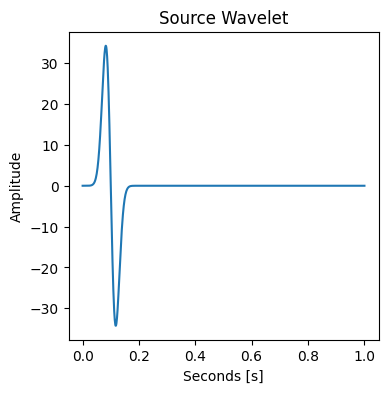

In [81]:
#Initialization
Nx = 1000
Nt = 1001

isrc = 100 #Source location
ir = 800 #Reveiver location
f0 = 40
t0 = (f0/10) / f0
src = np.zeros(Nt+1)
time = np.linspace(0,Nt*dt,Nt)
src = -2. * (time-t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time-t0) ** 2))



plt.figure(figsize=(4,4))
plt.plot(time,source(time));
plt.xlabel("Seconds [s]")
plt.ylabel("Amplitude")
plt.title("Source Wavelet")



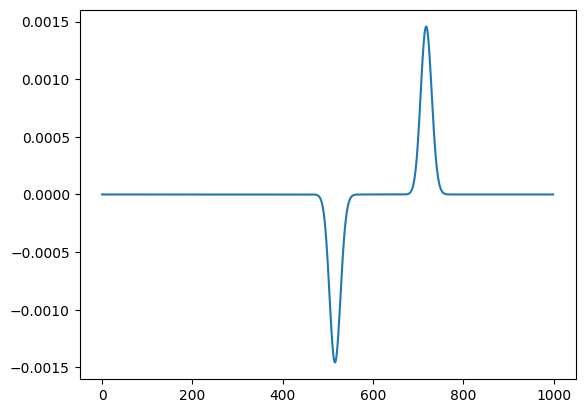

In [82]:
p = np.zeros(Nx)
p_old = np.zeros(Nx)
p_new = np.zeros(Nx)
d2px = np.zeros(Nx)

c = np.zeros(Nx)
c = c + c0

x = np.arange(Nx)
x = x * dx
seis = np.zeros(Nt)

def finite_diff(Nt,Nx,c0,dx,dt):
    #Initalize
    p = np.zeros(Nx)
    p_old = np.zeros(Nx)
    p_new = np.zeros(Nx)
    d2px = np.zeros(Nx)
    c = np.zeros(Nx)
    c = c + c0
    x = np.arange(Nx)
    x = x * dx
    for i in range(Nt):
        for j in range(Nx-1):
            d2px[j] = (p[j+1] - 2* p[j] + p[j-1])/ dx**2    #Spatial term
        p_new = 2 * p - p_old + c**2 *dt**2 * d2px
        p_new[isrc] += src[i] / (dx) * dt**2
        p_old, p = p, p_new

    return p_new

p_new = finite_diff(Nt,Nx,c0,dx,dt)

plt.plot(p_new)

In [52]:
20%10

0

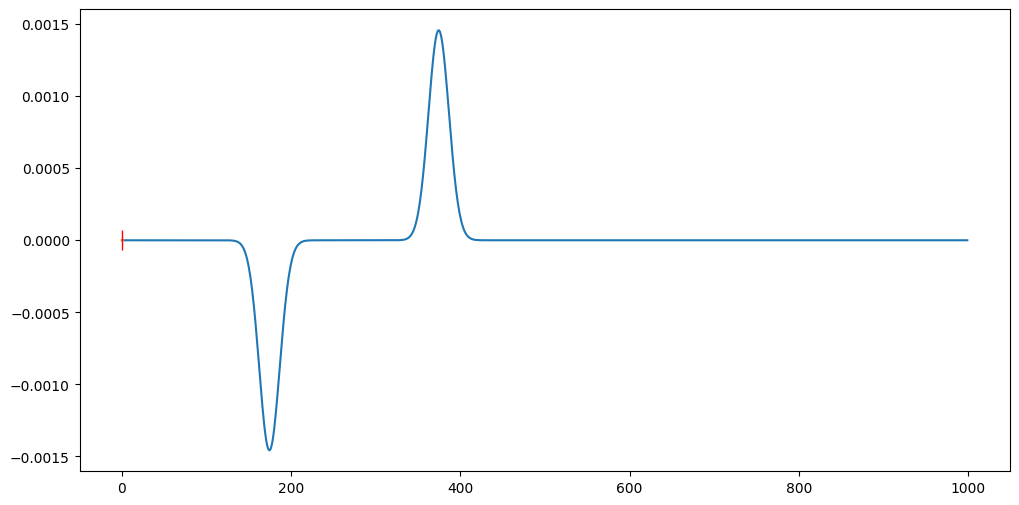

In [108]:

fig2  = plt.figure(figsize=(12, 6))
ax3  = plt.subplot(1,1,1)
ax4  = plt.subplot(1,1,1)
up31,= ax3.plot(p) # plot pressure update each time step
up41,= ax4.plot(time, seis) # update recorded seismogram each time step
up42,= ax4.plot([0], [0], 'r|', markersize=15) # update time step position